# Le réchauffement climatique

**Modélisation Numérique en Physique - S2**

**Miniprojet 3**

**ARGUELLO Camilo**


## Tableau

1. Introduction
2. Réchauffement température
3. Modèle de réchauffement
4. Conclusion

## Introduction

On se place dans le cas de l'analyse de rechauffement climatique. Pour cela, il faut se poser quelques questions tels que: Pourquoi l'année dérniere s'était le plus froide dans quelques régions et le plus chaude dans d'autres? Comment on est capables à prédire le changement du climat à long terme? Est-ce on peut considérer qu'on est au cours d'un réchauffement climatique? Si cela est vrai, est-ce que le réchauffement est significatif ? 

On va commencer pour mettre en évidence la différence entre la **météo** et le **climat**. 

- La **méteo** est ce qu'il fait l'atmosphère à court terme, c'est à dire est un processus chaotique, car une perturbation microscopique peut entrâiner des changements à grande échelle. Cela éxplique pourquoi les conditions météorologiques peuvent changer au cours de quelques jours ou semaines, où on peut avoir des jours plus chauds ou plus froids. [nasa.gov/weather](https://www.nasa.gov/mission_pages/noaa-n/climate/climate_weather.html)
  

- Le **climat** montre la moyenne à long terme du temps sur un certain nombre d'années, et il dépend des variables globales qui donnent l'équilibre énergetique dans l'atmosphère. Par exemple des changements produites par les gas à effet serre. [nasa.gov/climate](https://www.nasa.gov/mission_pages/noaa-n/climate/climate_weather.html)

Dans ce calepin, on va analyser un ensemble des données de température quotidiennes enregistres à la station météorologique de Montélimar depuis juin 1920.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime
import math

In [2]:
# I consider 'j' as julian column & 't' as temperature
columns = ['j', 't'] 
df = pd.read_csv('montelimar_temperature.dat', sep='\s+', names=columns ,encoding = 'utf-8')
df.head()

,j,t
0,22553,22.6
1,22554,22.6
2,22555,24.8
3,22556,17.5
4,22557,16.5


In [3]:
## Ref
# Github Gist - Functions with Julian Date and Modified Julian Date
# https://gist.github.com/jiffyclub/1294443

def mjd_to_jd(mjd):
    """
    Convert Modified Julian Day to Julian Day.
    Parameters
    ----------
    mjd : float
        Modified Julian Day
    Returns
    -------
    jd : float
        Julian Day    
    """
    return mjd + 2400000.5

def jd_to_date(jd):
    """
    Convert Julian Day to date.
    Algorithm from 'Practical Astronomy with your Calculator or Spreadsheet', 
        4th ed., Duffet-Smith and Zwart, 2011.
    Parameters
    ----------
    jd : float
        Julian Day
    Returns
    -------
    str : year-month-day
    """
    jd = jd + 0.5
    
    F, I = math.modf(jd)
    I = int(I)
    A = math.trunc((I - 1867216.25)/36524.25)
    if I > 2299160:
        B = I + 1 + A - math.trunc(A / 4.)
    else:
        B = I
    C = B + 1524
    D = math.trunc((C - 122.1) / 365.25)
    E = math.trunc(365.25 * D)
    G = math.trunc((C - E) / 30.6001)
    day = C - E + F - math.trunc(30.6001 * G)
    if G < 13.5:
        month = G - 1
    else:
        month = G - 13
    if month > 2.5:
        year = D - 4716
    else:
        year = D - 4715
    return str(year)+'-%02d'%month+'-%02d'%day

In [4]:
# First, lets add one column to the dataframe to have a calendar date to plot
global_date = list()

for jd in mjd_to_jd(df['j']):
    date = jd_to_date(jd)
    global_date.append(np.datetime64(date))

df['date'] = np.array(global_date, dtype = 'datetime64')

# Also, for management conditions we will have a list of index as day
df['d'] = np.arange(1, len(df['t']) + 1)

df.head()

,j,t,date,d
0,22553,22.6,1920-08-17,1
1,22554,22.6,1920-08-18,2
2,22555,24.8,1920-08-19,3
3,22556,17.5,1920-08-20,4
4,22557,16.5,1920-08-21,5


## 1 - Réchauffement température

Les données sont composées d'une colonne de *Modified Julian Day* et une deuxième de *Température*. La première chose qu'on va montrer c'est si à partir d'une échelle de jours petite, (environ 100 jours), il y aura une tendence dans la temperature, et vérifier si la météo dans une certaine période peut être utilisé pour estimer les changements futurs.

In [5]:
def modlin(x, a, b):
    '''
        Fonction qui représente le modèle linéaire
        y(x; a, b) = a + bx
    '''
    return a + b * x

In [6]:
def plot_model (x,a,b):
    """
    @description Cette fonction faite un modèle linéare avec un plot (modèle + données)
    """
    y = (a * x) + b

    # Calcul de la somme S
    Si = (df['t'][:N] - y) ** 2
    S = np.sum(Si)

    plt.plot(x, df['t'][:N], '+k')
    plt.plot(x, y, '-b', label = 'modèle')
    plt.xlabel('Jours')
    plt.ylabel('°C')
    plt.title('Variation météo dans N=' +str(N)+ ' jours, S = ' + str(np.around(S,2)))
    plt.grid()
    plt.show()

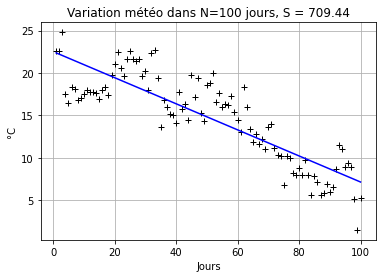

In [7]:
N = 100
x = df['d'][:N]
regression_lineal = curve_fit(modlin, x, df['t'][:N], p0 = [0., 10.])
a = regression_lineal[0][1]
b = regression_lineal[0][0]
plot_model(x,a,b)

Si on se place dans un période `N=100` on peut rémarquer qu'il aura une tendence liée à la saison annuelle. Cependant, en utilisant la somme de moindres carrées, on peut montrer que les données peuvent varier tellement chaque jour que le comportement futur ne peut être estimé.

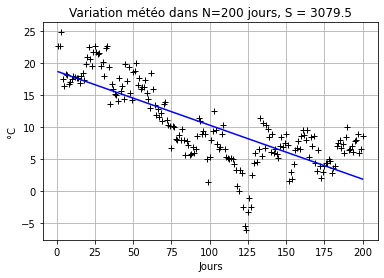

In [8]:
N = 200
x = df['d'][:N]
regression_lineal = curve_fit(modlin, x, df['t'][:N], p0 = [0., 10.])
a = regression_lineal[0][1]
b = regression_lineal[0][0]
plot_model(x,a,b)

Ceci est vérifié lorsqu'un plus grand nombre de jours est utilisé, il peut y avoir une journée très chaude ou très froide, ce qui finalement ne détermine pas l'état global de la température.

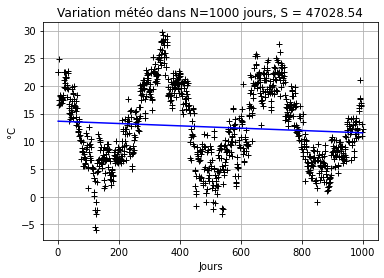

In [9]:
N = 1000
x = df['d'][:N]
regression_lineal = curve_fit(modlin, x, df['t'][:N], p0 = [0., 10.])
a = regression_lineal[0][1]
b = regression_lineal[0][0]
plot_model(x,a,b)

Dans le dernier graphique, nous avons une démonstration d'une température annuelle. Dans laquelle, en raison des saisons, il y a des périodes chaudes et froides. Par conséquent, notre modèle linéaire n'est pas utile. Parce que lorsqu'il peut avoir des hivers un peu plus froids et des étés plus chauds. Nous allons donc faire une estimation moyenne de la température de l'année, et comparer avec l'année suivante. 

In [10]:
def quadmodel(x, a, b, c):
  return (a * (x ** 2)) + (b * x) + c

In [11]:
n = len(df['t'])
step = 365 # Days of year

i = 0
j = step

# Global mean will contain the means for each year
global_mean = list()
global_mean.append(np.mean(df['t'][i:j]))

# Global max will have the maximum per year
global_max = list()
global_max.append(np.max(df['t'][i:j]))

for i in range(n):
    if i == j:
        j += step
        global_mean.append(np.mean(df['t'][i:j]))
        global_max.append(np.max(df['t'][i:j]))

Maintenant, si nous projetons les températures moyennes pour chaque année, on peut voir une croissance, que nous allons explorer avec une régression linéaire et quadratique.

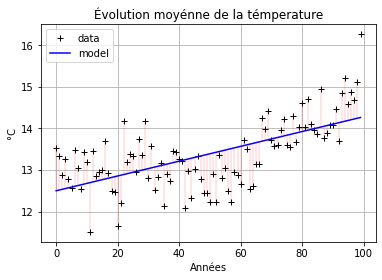

In [12]:
N = len(global_mean)
xdata = np.arange(0, N)
ydata = np.array(global_mean)

rg, _ = curve_fit(modlin, xdata, ydata) # Best parameters for linear model
ymod = modlin(xdata, *rg) # Use the parameters in the linear function

plt.plot(xdata, ydata, 'k+', label='data')
plt.plot(xdata, ymod, 'b', label='model')

# Plot the distances (red lines)
for i in range(N - 1):
    plt.plot((xdata[i], xdata[i]), (ydata[i], ymod[i]), '-r', linewidth=.2)

plt.title('Évolution moyénne de la témperature')
plt.ylabel('°C')
plt.xlabel('Années')
plt.grid()
plt.legend()
plt.show()

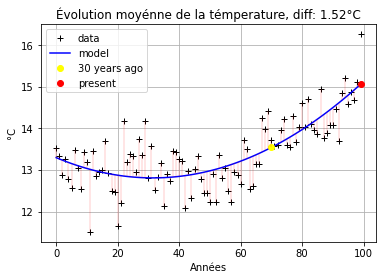

In [13]:
N = len(global_mean)
xdata = np.arange(0, N)
ydata = np.array(global_mean)
ymaxdata = np.array(global_max)

rg, _ = curve_fit(quadmodel, xdata, ydata)
ymod = quadmodel(xdata, *rg)

plt.plot(xdata, ydata, 'k+', label='data')
plt.plot(xdata, ymod, 'b', label='model')
plt.plot(N-30, ymod[N-30], 'o', c='yellow', label='30 years ago')
plt.plot(N-1, ymod[N-1], 'o', c='red',label='present')

for i in range(N - 1):
    plt.plot((xdata[i], xdata[i]), (ydata[i], ymod[i]), '-r', linewidth=.2)

# Temperature difference between last 30 years (mean)
dif_temp = ymod[N-1] - ymod[N-30] 

plt.title('Évolution moyénne de la témperature, diff: ' + str(np.around(dif_temp,2)) + '°C' )
plt.ylabel('°C')
plt.xlabel('Années')
plt.grid()
plt.legend()
plt.show()

On constate une augmentation d'environ $1,52°C$ de la température moyenne au cours des 30 dernières années.

## 2 - Modèle de réchauffement

Nous allons maintenant modéliser la croissance de température, sachant qu'il est donné annuellement par une variation sinusoïdale, avec de périodes froides et chaudes. Pour cela on va utiliser une fonction qui dépend des données du problème, telle que $A$ comme l'amplitude maximale par an et $B$ la croissance donnée par le modèle étudié dans la section précédente. Dans cette exemple la phase $\phi=0$

$$ T(t) = A \sin{(\omega t + \phi)} + B $$

In [14]:
# Here we want to calculate the average amplitude per year
# We will have a list of amplitudes (one per year)
# If i Have let's say 100 years to compare with, we will consider the least square method to calculate the amplitude
# I consider steps = 10 to have each sinusoidal function with the one amplitude in that period 

step = 10
global_amplitude = list()

i = 0
j = step

Si = (ydata - ymod) ** 2

# When i = 0 and j = 10
somme = np.sum(Si[i:j])
for i in range (step):
    global_amplitude.append(somme)

# For the rest... 
while (i < len(Si)):
    if (i == j):
        j += step
        somme = np.sum(Si[i:j])
        for i in range (step):
            global_amplitude.append(somme)
    i += 1

yamplitude = np.array(global_amplitude) # Amplitude of each year (with 10 times the value per year)

Text(0.5, 1.0, 'Modéle de température 1 an')

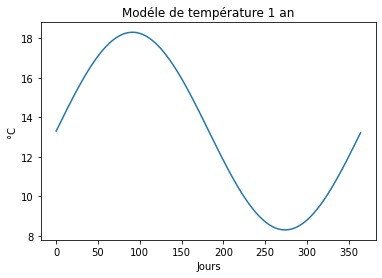

In [15]:
# Model of a Sinus function
# It represents one year
start_time = 0
end_time = 365

t = np.arange(start_time, end_time)

A = 5
w = 2 * np.pi / 365
phi = 0
B = ymod[0]

T = lambda t : A * np.sin(w * t + phi) + B

plt.plot(t,T(t))
plt.xlabel('Jours')
plt.ylabel('°C')
plt.title('Modéle de température 1 an')

In [16]:
# On défine une fonction sinusoidal

start_time = 0
end_time = 365
years = 365 * 10 # Frequency every 10 years
                 # To prevent having too many sinusoidal functions

i = 0
j = 0
w = 2 * np.pi / years
phi = 0

T = lambda t : A * np.sin(w * t + phi) + B

global_T = list()
global_t = list()

while (i < len(ydata) - 1):
    t = np.arange(start_time, end_time) # To analyse every year 
    A = yamplitude[i]
    B = ymod[i]
    global_t.append(t)
    global_T.append(T(t))

    start_time += 365
    end_time += 365 
    i += 1


global_T = np.array(global_T).flatten() # Array of Temperatures adjusted to the model
global_t = np.array(global_t).flatten() # Array of time adjusted to the model
# I use flatten to avoid having shapes of (100, 365) -> 100 years of 365 days and to have 1 row of days for all years

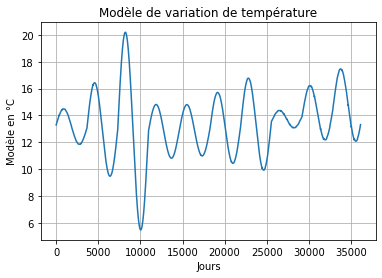

In [17]:
#erreurs = 2. * np.ones(global_t.shape) # m/s
# Représentation graphique des données avec les barres d'erreur
#plt.errorbar(global_t, global_T, yerr=erreurs, marker = '+', linestyle = '')

y = global_T.copy()
x = global_t.copy()

plt.plot(x,y)

plt.title('Modèle de variation de température')
plt.xlabel('Jours')
plt.ylabel('Modèle en °C')
plt.grid()
plt.show()

Nous pouvons voir qu'on a des variations moyennes entre 16 et 12 °C, cependant nous pouvons vérifier une variation supérieure à 5 °C.

In [18]:
def modlin(t, C):
    """
    @description cette fonction est de la forme C * t pour donnéer l'augmentation de la temperature globale
    """
    return C * t

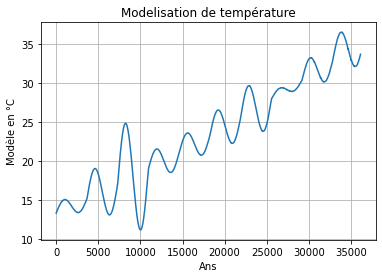

In [19]:
# best value C for the model
rg, _ = curve_fit(f=modlin, xdata=global_t, ydata=global_T) 

linear = modlin(global_t, *rg)
sinusoidal = global_T + rg[0] * global_t

plt.plot(global_t,sinusoidal)
plt.title("Modelisation de température")
plt.xlabel('Ans')
plt.ylabel('Modèle en °C')
plt.grid()
plt.show()

On peut enfin recréer une croissance en la température moyenne pendant 100 ans. À l'aide d'une régression linéaire et des fonctions sinusoïdales.

## 3- Conclusion

Les résultats montrent qu'il est difficile de prédire la météo, mais l'évolution du climat est prévisible. Même si elle a changé plusieurs fois dans l'histoire de la terre, en raison d'altérations de haut niveau, on peut voir que l'augmentation de température au cours des 30 dernières années est importante, et est liée, comme l'affirment de nombreuses études, à une augmentation des gaz à effet serre.